# Background

The fishing industry uses numerous measurements to describe a specific fish.  Our goal is to predict the weight of a fish based on a number of these measurements and determine if any of these measurements are insignificant in determining the weigh of a product.  See below for the description of these measurments.  

## Data Description

The data consists of the following variables:

1. **Weight**: weight of fish in g (numerical)
2. **Species**: species name of fish (categorical)
3. **Body.Height**: height of body of fish in cm (numerical)
4. **Total.Length**: length of fish from mouth to tail in cm (numerical)
5. **Diagonal.Length**: length of diagonal of main body of fish in cm (numerical)
6. **Height**: height of head of fish in cm (numerical)
7. **Width**: width of head of fish in cm (numerical)

## Read the data

In [1]:
# Import library you may need
library(car)
library(MASS)
# Read the data set
fishfull = read.csv("Fish.csv",header=T, fileEncoding = 'UTF-8-BOM')
row.cnt = nrow(fishfull)
# Split the data into training and testing sets
fishtest = fishfull[(row.cnt-9):row.cnt,]
fish = fishfull[1:(row.cnt-10),]

Loading required package: carData



*Please use fish as your data set for the following questions unless otherwise stated.*

# Question 1: Exploratory Data Analysis [8 points]

**(a) Create a box plot comparing the response variable, *Weight*, across the multiple *species*.  Based on this box plot, does there appear to be a relationship between the predictor and the response?**

,Weight,Species,Body.Height,Total.Length,Diagonal.Length,Height,Width
,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,300,Pike,34.8,37.3,39.8,6.2884,4.0198
2,242,Bream,23.2,25.4,30.0,11.5200,4.0200
3,500,Bream,29.1,31.5,36.4,13.7592,4.3680
4,600,Bream,29.4,32.0,37.2,15.4380,5.5800
5,345,Pike,36.0,38.5,41.0,6.3960,3.9770
6,1000,Perch,40.2,43.5,46.0,12.6040,8.1420


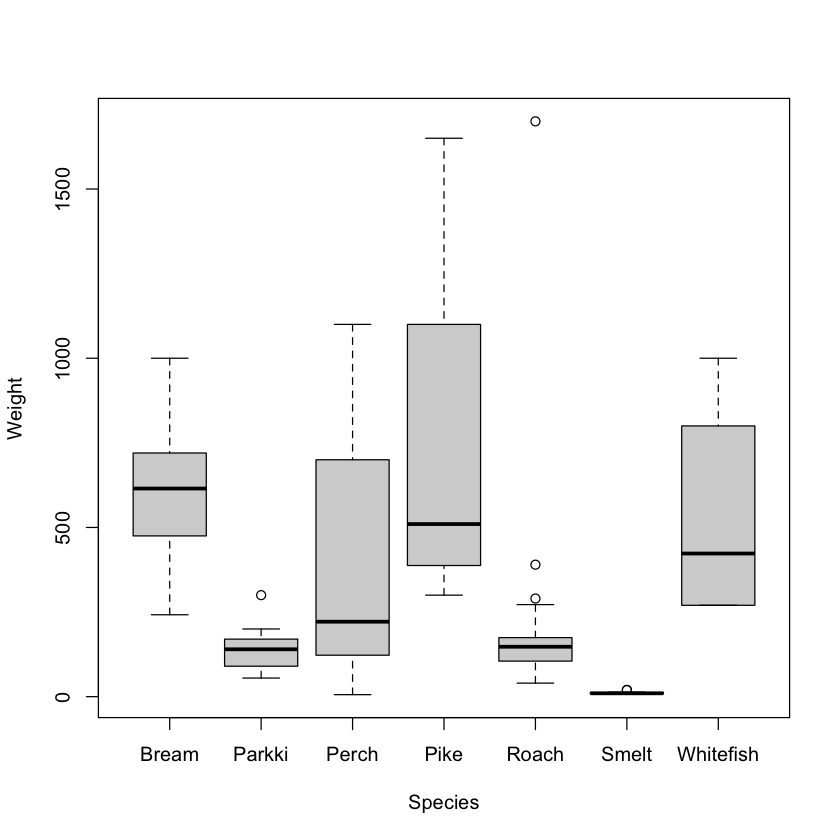

In [2]:
head(fish)
boxplot(Weight~Species, data=fish)

Yes - there appears to be some relationship between the weight and species.

**(b) Create scatterplots of the response, *Weight*, against each quantitative predictor, namely **Body.Height**, **Total.Length**, **Diagonal.Length**, **Height**, and **Width**.  Describe the general trend of each plot.  Are there any potential outliers?**

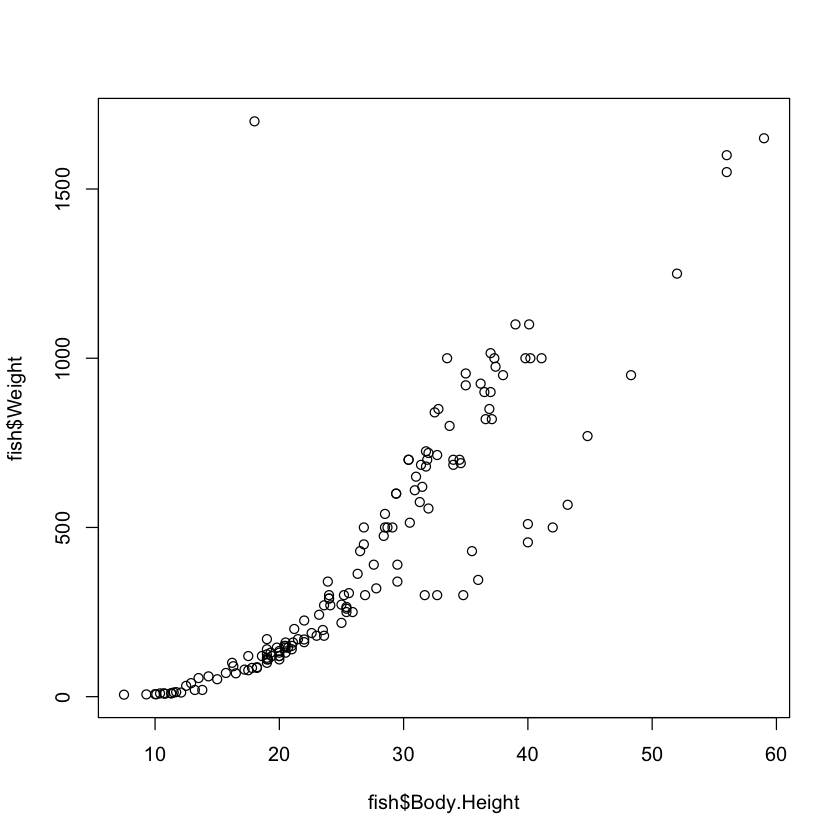

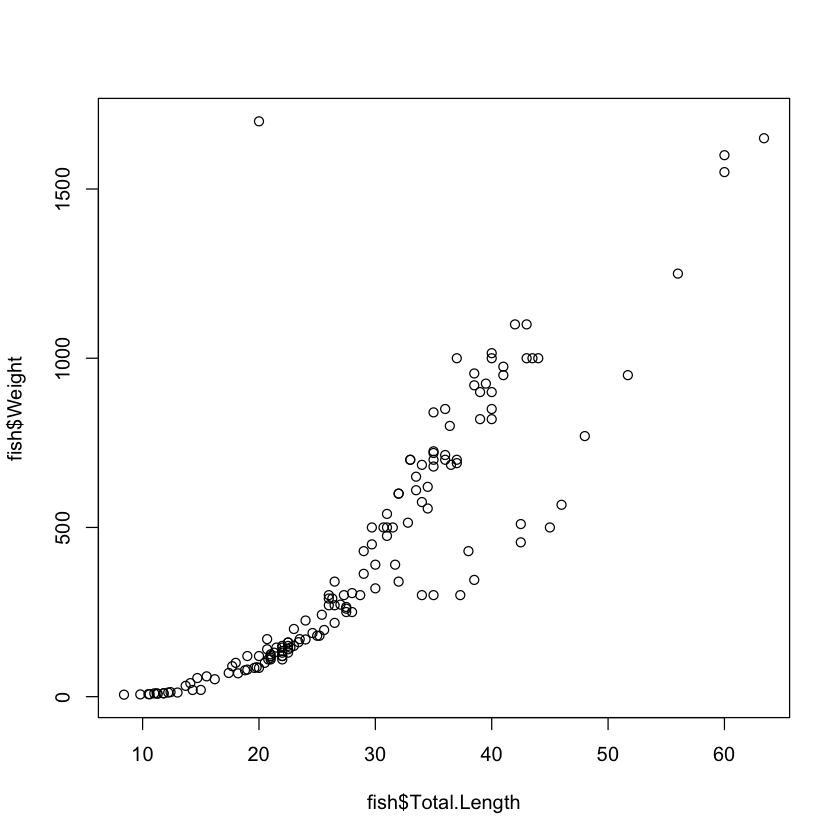

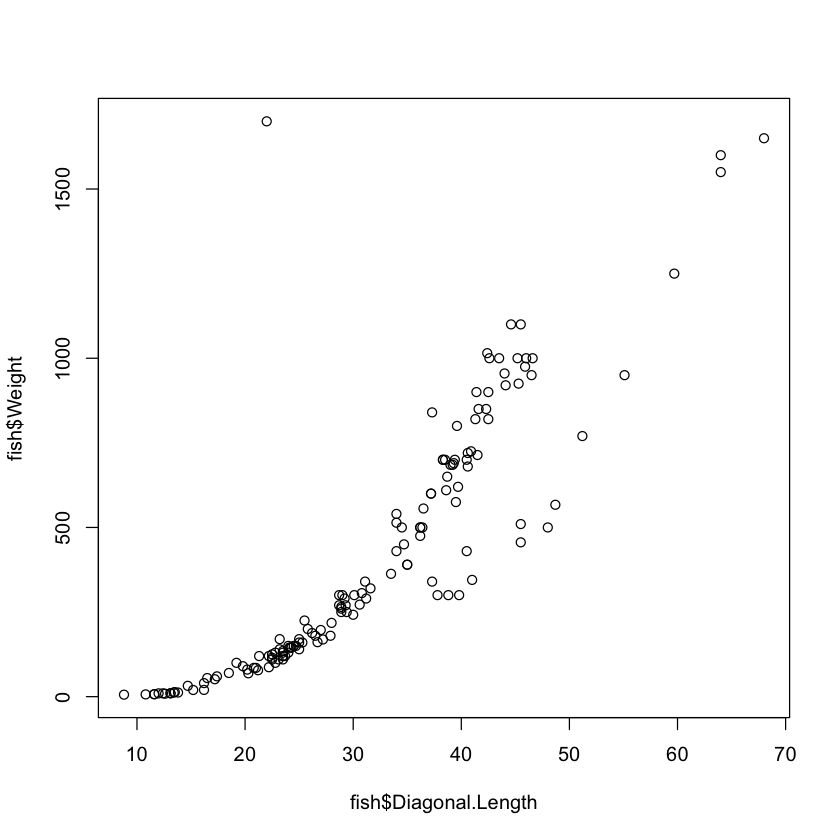

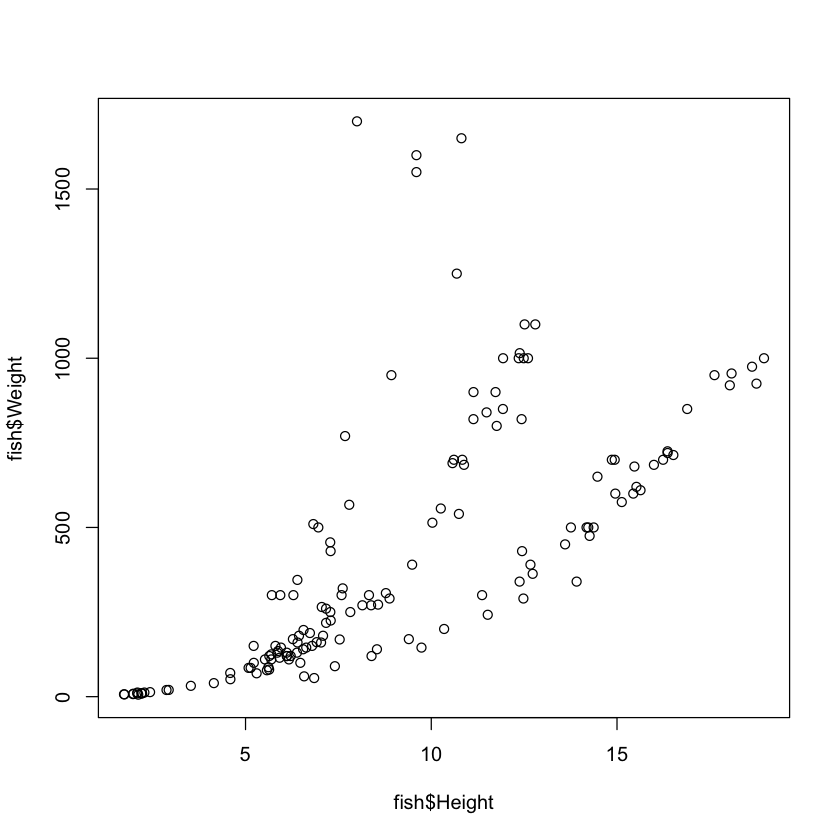

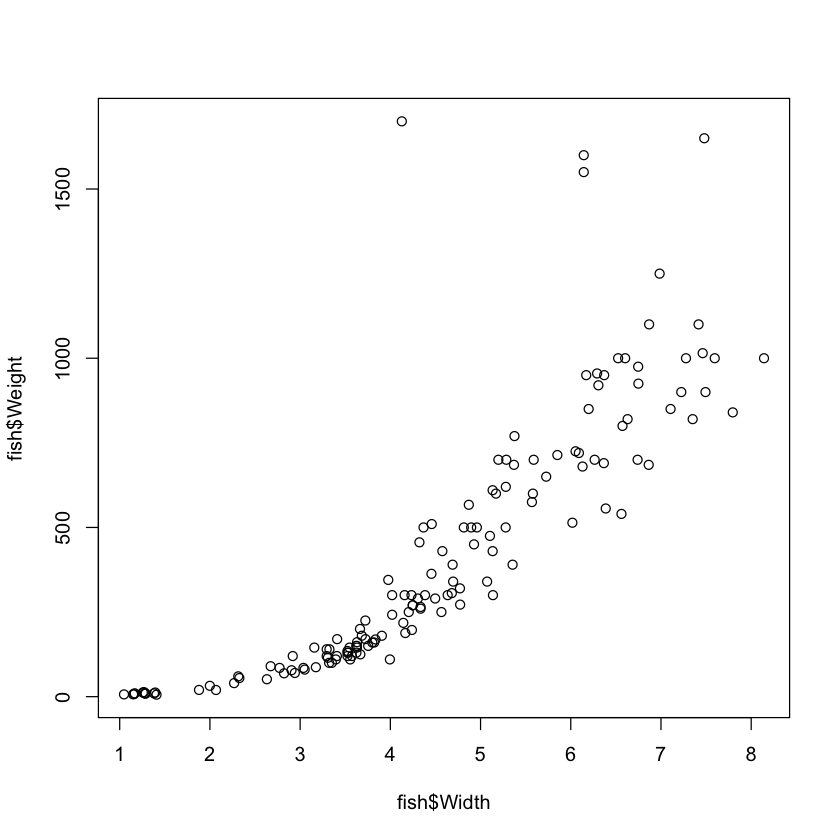

In [3]:
plot(x=fish$Body.Height, y=fish$Weight)
plot(x=fish$Total.Length, y=fish$Weight)
plot(x=fish$Diagonal.Length, y=fish$Weight)
plot(x=fish$Height, y=fish$Weight)
plot(x=fish$Width, y=fish$Weight)

Body.Height vs Weight:
The overall plot displays a distinct postive relationship that deviates slightly from linear. There appears to be one potential outlier where a fish with a Body.Height of ~20 weighs significantly more than other data points of the same Body.Height.

Total.Length vs Weight:
This plot displays a similar positive relationship as Body.Height. There does appear to be one potential outlier.

Diagonal.Length vs Weight:
This plot displays a similar positive relationship as the previous two plots. There does appear to be one potential outlier.

Height vs Weight:
The plot shows a positive relationship that deviates significantly from linear. This is in contracts to the previous plots. There does not seem to be any outliers as all data points appear to be within the spread of the data.

Width vs Weight:
THe plot shows a positive relationship that deviates slightly from linear. There are multiple potential outliers where the weight of the fish is significantly heavier than fish of the same width.

**(c) Display the correlations between each of the quantitative variables.  Interpret the correlations in the context of the relationships of the predictors to the response and in the context of multicollinearity.**

In [4]:
cor(fish[,3:6])

,Body.Height,Total.Length,Diagonal.Length,Height
Body.Height,1.0000000,0.9995134,0.9919502,0.6268604
Total.Length,0.9995134,1.0000000,0.9940896,0.6422261
Diagonal.Length,0.9919502,0.9940896,1.0000000,0.7052116
Height,0.6268604,0.6422261,0.7052116,1.0000000


Diagonal.Length, Total.Length, and Body.Height are highly correlated with each other as evidenced by the correlation coefficient being greater than 0.99. Therefore, these three variables may display multicollinearity.



**(d) Based on this exploratory analysis, is it reasonable to assume a multiple linear regression model for the relationship between *Weight* and the predictor variables?**



Yes - we may proceed in using a multiple linear regression model assuming the multicollinearity displayed in part c is accounted for. Further, we may need to transform the variables to create a linear relationship between the predictor and response variable. In addition, we must ensure all assumptions of the multiple linear regression are met prior to proceeding with the model.

# Question 2: Fitting the Multiple Linear Regression Model [8 points]

*Create the full model without transforming the response variable or predicting variables using the fish data set.  Do not use fishtest*

**(a) Build a multiple linear regression model, called model1, using the response and all predictors.  Display the summary table of the model.**

In [5]:
model1 <- lm(Weight~., data=fish)
summary(model1)


Call:
lm(formula = Weight ~ ., data = fish)

Residuals:
    Min      1Q  Median      3Q     Max 
-211.37  -70.59  -23.50   42.42 1335.87 

Coefficients:
                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)       -813.90     218.34  -3.728 0.000282 ***
SpeciesParkki       79.34     132.71   0.598 0.550918    
SpeciesPerch        10.41     206.26   0.050 0.959837    
SpeciesPike         16.76     233.06   0.072 0.942775    
SpeciesRoach       194.03     156.84   1.237 0.218173    
SpeciesSmelt       455.78     204.92   2.224 0.027775 *  
SpeciesWhitefish    28.31     164.91   0.172 0.863967    
Body.Height       -176.87      61.36  -2.882 0.004583 ** 
Total.Length       266.70      77.75   3.430 0.000797 ***
Diagonal.Length    -72.49      49.48  -1.465 0.145267    
Height              38.27      22.09   1.732 0.085448 .  
Width               29.63      40.54   0.731 0.466080    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error:

**(b) Is the overall regression significant at an $\alpha$ level of 0.01? Explain.**

Yes the overall regression is significant with an $\alpha$ level of 0.01. THe overall p-value is $\approx$ 0 which is less than 0.01.

**(c) What is the coefficient estimate for *Body.Height*? Interpret this coefficient.**

THe coefficient estimate for Body.Height is -176.87. This shows that weight is estimated to decrease by -176.87 per unit increase of Body.Height, keeping all other variables constant. 

**(d) What is the coefficient estimate for the *Species* category Parkki? Interpret this coefficient.**

The coefficinet estimate for the species category Parkki is 79.34 which indicates that the weight is estimated to increase by 79.34 over the average when the species is Parkki.


# Question 3: Checking for Outliers and Multicollinearity [6 points]

**(a) Create a plot for the Cook's Distances. Using a threshold Cook's Distance of 1, identify the row numbers of any outliers.**

[1] "The only outlier in the dataset is at index 30"

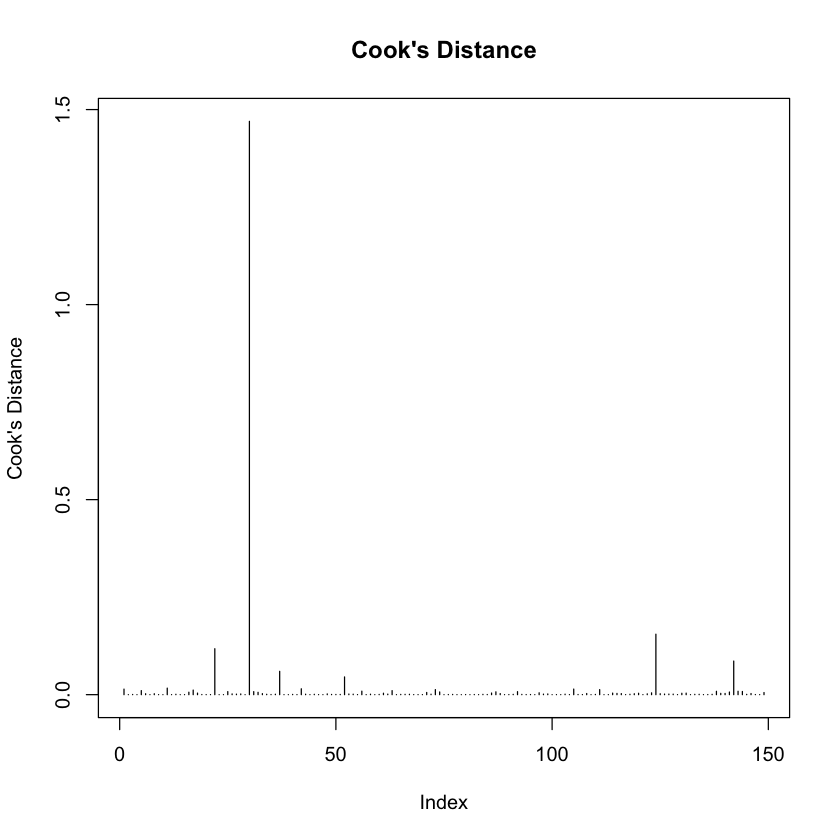

In [6]:
cook = cooks.distance(model1)

plot(cook, type="h", ylab="Cook's Distance", main = "Cook's Distance")

outlier <- as.numeric(names(cook)[cook > 1] )

paste("The only outlier in the dataset is at index", outlier)

**(b) Remove the outlier(s) from the data set and create a new model, called model2, using all predictors with *Weight* as the response.  Display the summary of this model.**

In [7]:
fish2 <- fish[-outlier, ]
model2 <- lm(Weight~., data=fish2)

summary(model2)


Call:
lm(formula = Weight ~ ., data = fish2)

Residuals:
    Min      1Q  Median      3Q     Max 
-211.10  -50.18  -14.44   34.04  433.68 

Coefficients:
                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)      -969.766    131.601  -7.369 1.51e-11 ***
SpeciesParkki     195.500     80.105   2.441 0.015951 *  
SpeciesPerch      174.241    124.404   1.401 0.163608    
SpeciesPike      -175.936    140.605  -1.251 0.212983    
SpeciesRoach      141.867     94.319   1.504 0.134871    
SpeciesSmelt      489.714    123.174   3.976 0.000113 ***
SpeciesWhitefish  122.277     99.293   1.231 0.220270    
Body.Height       -76.321     37.437  -2.039 0.043422 *  
Total.Length       74.822     48.319   1.549 0.123825    
Diagonal.Length    34.349     30.518   1.126 0.262350    
Height             10.000     13.398   0.746 0.456692    
Width              -8.339     24.483  -0.341 0.733924    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error

**(c) Display the VIF of each predictor for model2. Using a VIF threshold of max(10, 1/(1-$R^2$) what conclusions can you draw?**

In [8]:
vif(model2)

,GVIF,Df,GVIF^(1/(2*Df))
Species,1545.55017,6,1.843983
Body.Height,2371.15420,1,48.694499
Total.Length,4540.47698,1,67.383062
Diagonal.Length,2126.64985,1,46.115614
Height,56.21375,1,7.497583
Width,29.01683,1,5.386727


The VIFs of all factors are greater than the threshold of max(10, 1/(1-$R^2$). Therefore, we should not use all of the predictors in this model

# Question 4: Checking Model Assumptions [6 points]

*Please use the cleaned data set, which have the outlier(s) removed, and model2 for answering the following questions.*

**(a) Create scatterplots of the standardized residuals of model2 versus each quantitative predictor. Does the linearity assumption appear to hold for all predictors?**

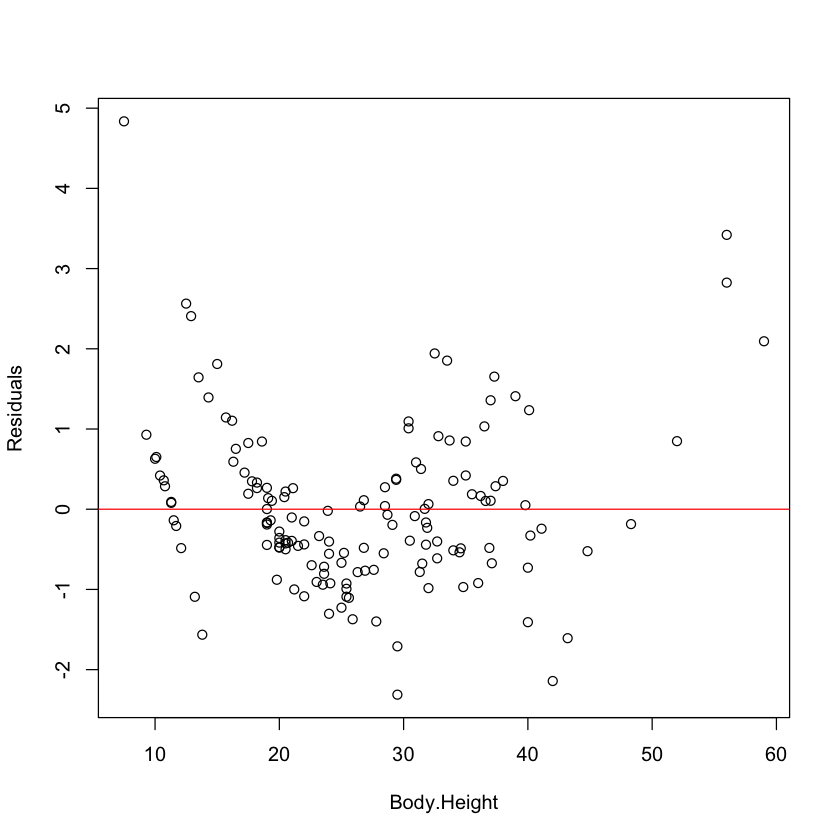

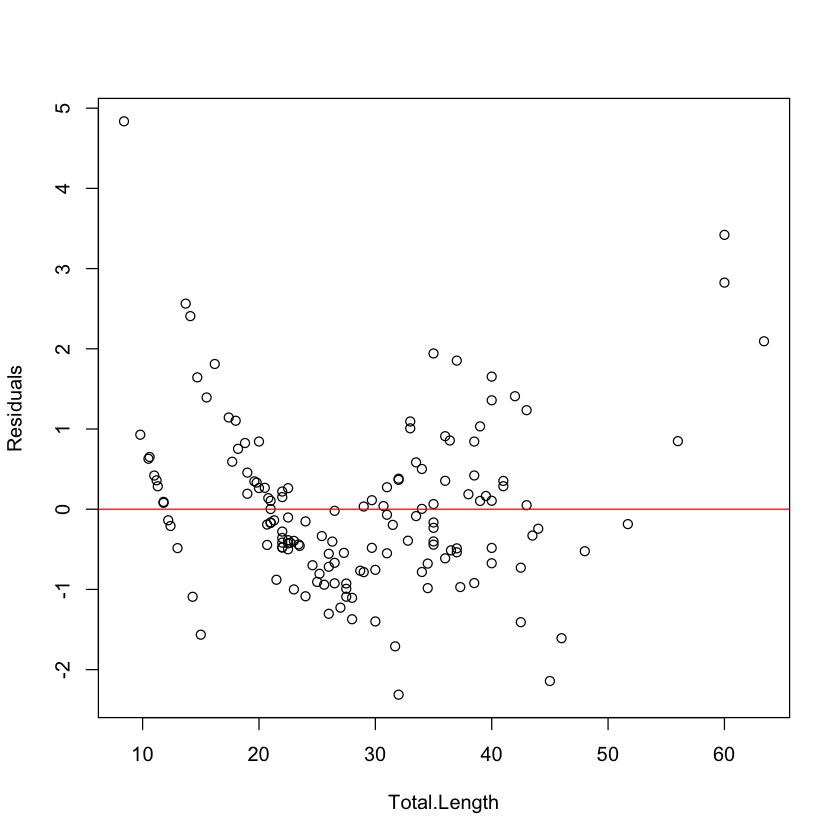

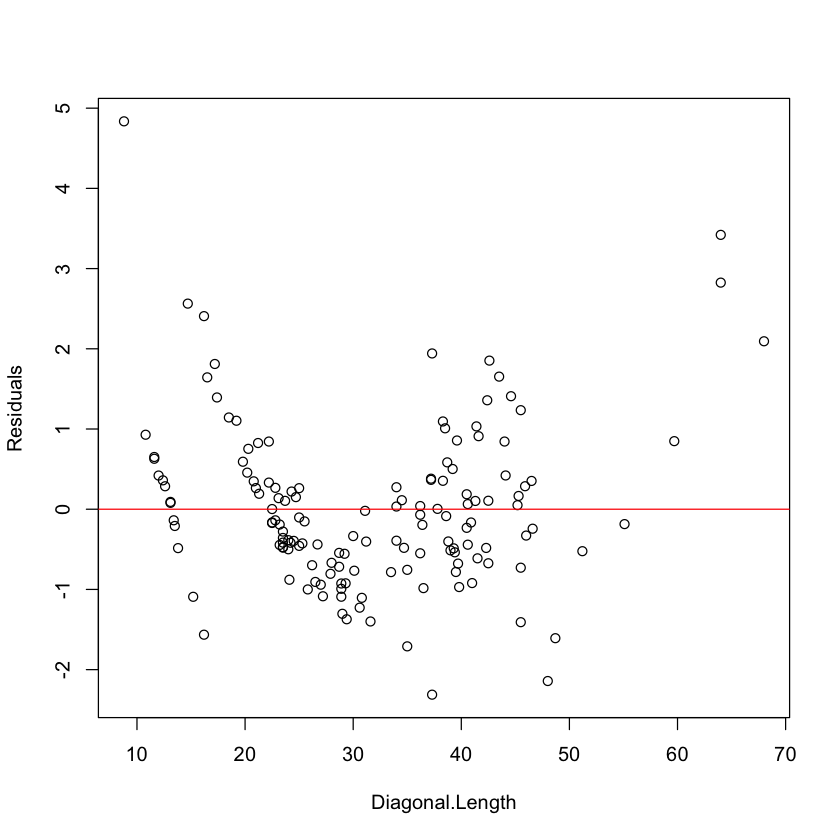

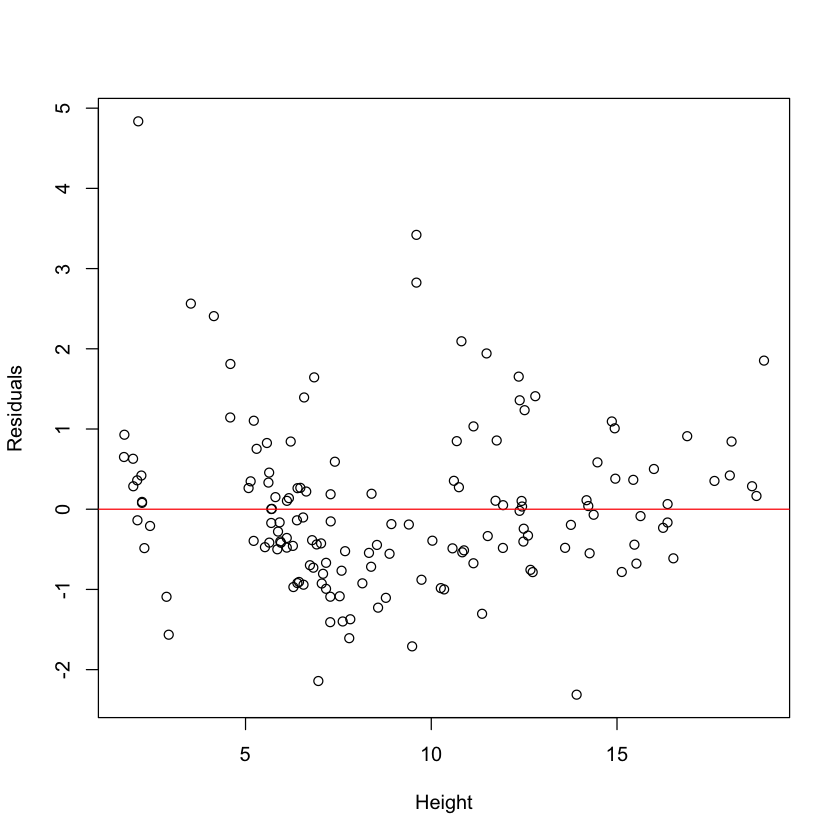

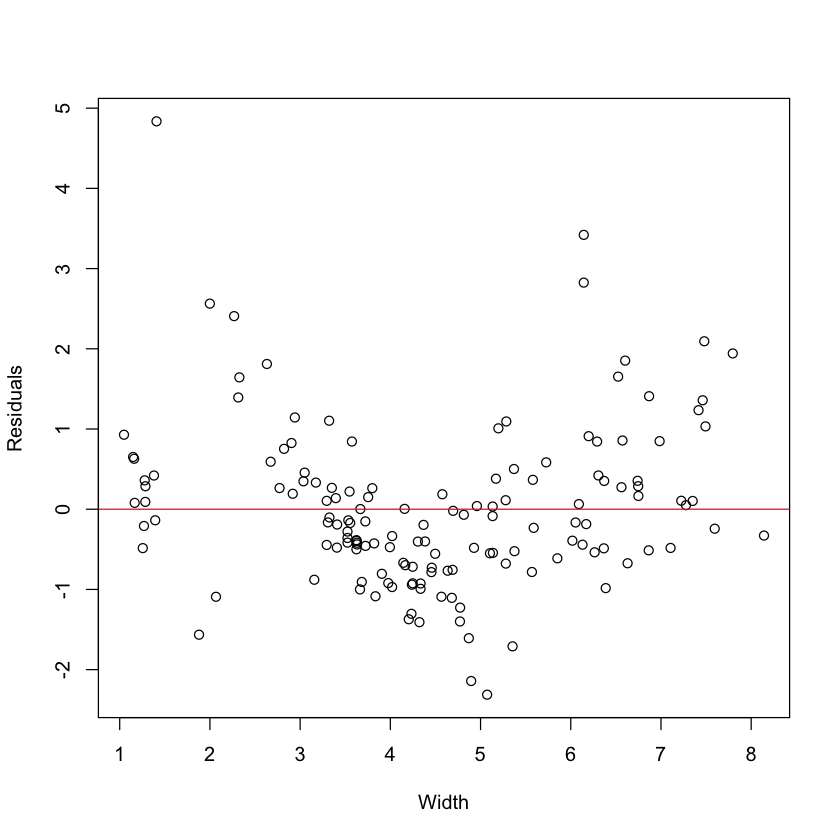

In [9]:
resids = stdres(model2)

plot(fish2[,3], resids, xlab="Body.Height", ylab="Residuals")
abline(0,0,col="red")

plot(fish2[,4], resids, xlab="Total.Length", ylab="Residuals")
abline(0,0,col="red")

plot(fish2[,5], resids, xlab="Diagonal.Length", ylab="Residuals")
abline(0,0,col="red")

plot(fish2[,6], resids, xlab="Height", ylab="Residuals")
abline(0,0,col="red")

plot(fish2[,7], resids, xlab="Width", ylab="Residuals")
abline(0,0,col="red")


All plots seem to show a non-linear relationship between the residuals and predicting variable. Indicating that the linearity assumption does not hold.

**(b) Create a scatter plot of the standardized residuals of model2 versus the fitted values of model2.  Does the constant variance assumption appear to hold?  Do the errors appear uncorrelated?**

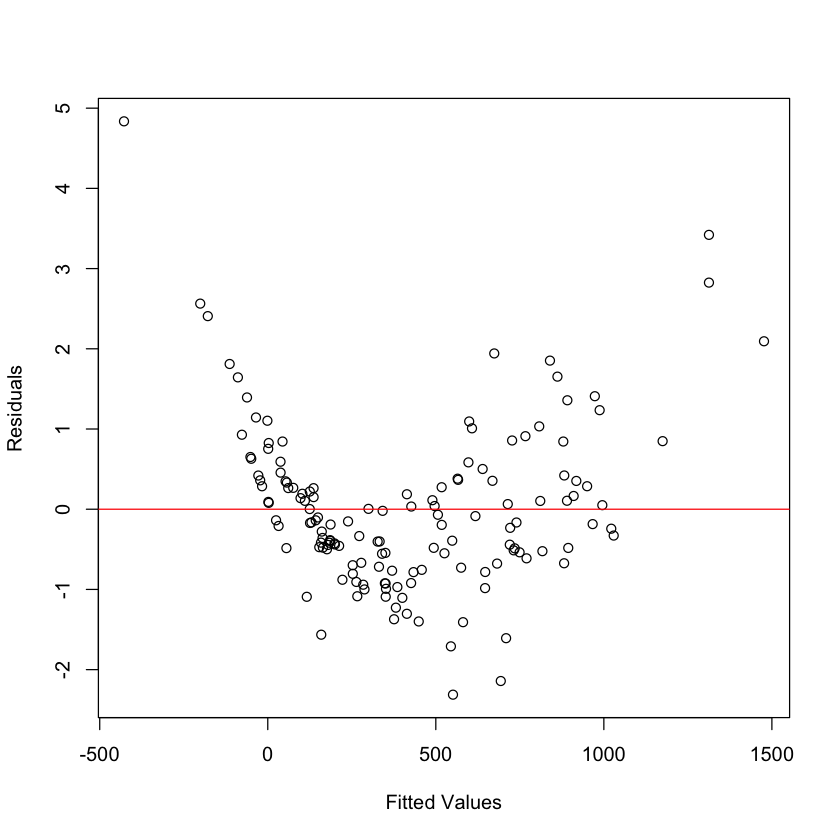

In [10]:
fits = model2$fitted

plot(fits, resids, xlab="Fitted Values", ylab="Residuals")
abline(0,0,col="red")

No the standardized residuals appear correlated with the fitted values. Therefore the constant variance assumption does not hold.

**(c) Create a histogram and normal QQ plot for the standardized residuals. What conclusions can you draw from these plots?**

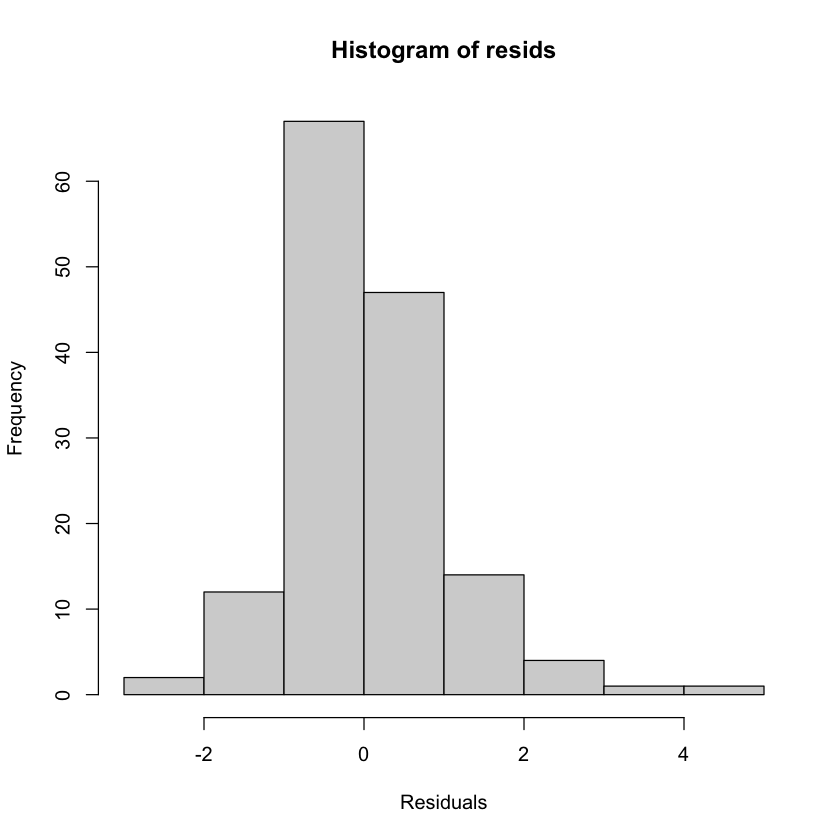

37 124 
 36 123

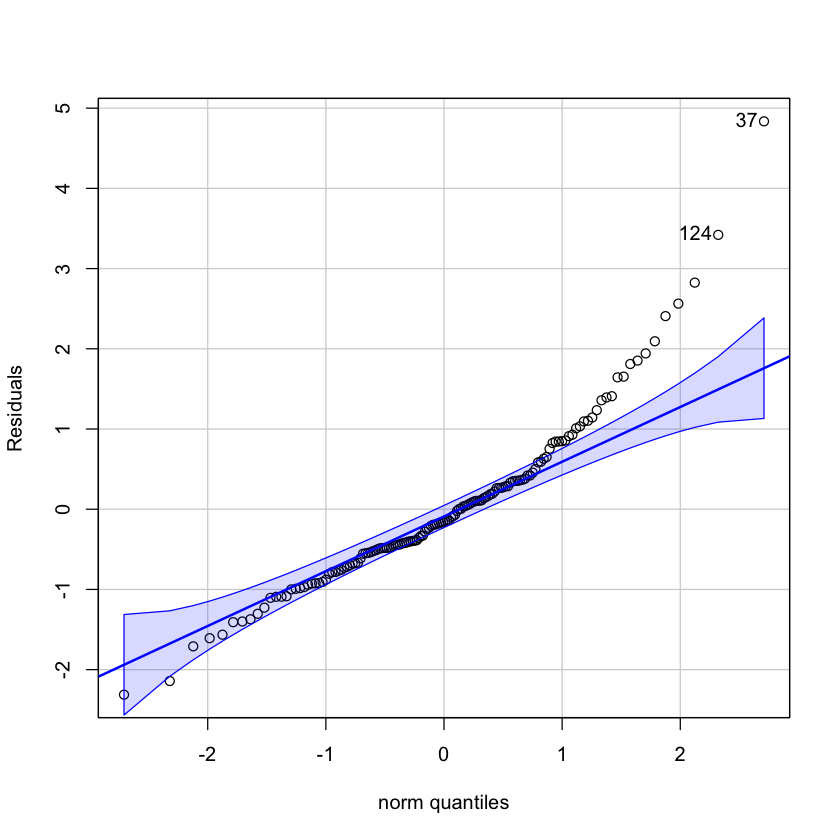

In [11]:
hist(resids, xlab="Residuals", nclass=10)
qqPlot(resids, ylab="Residuals")

The histogram shows a slight skew indicating that the distribution of the residuals may not be normal. Further, there is a large tail in the upper quantiles of the q-q plot. Therefore the normality assumption does not hold.


# Question 5: Partial F Test [6 points]

**(a) Build a third multiple linear regression model using the cleaned data set without the outlier(s), called model3, using only *Species* and *Total.Length* as predicting variables and *Weight* as the response.  Display the summary table of the model3.**

In [12]:
model3 <- lm(Weight~Species + Total.Length, data=fish2)
summary(model3)


Call:
lm(formula = Weight ~ Species + Total.Length, data = fish2)

Residuals:
    Min      1Q  Median      3Q     Max 
-233.83  -56.59  -10.13   34.58  418.30 

Coefficients:
                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)      -730.977     42.449 -17.220  < 2e-16 ***
SpeciesParkki      63.129     38.889   1.623    0.107    
SpeciesPerch      -23.941     21.745  -1.101    0.273    
SpeciesPike      -400.964     33.350 -12.023  < 2e-16 ***
SpeciesRoach      -19.876     30.111  -0.660    0.510    
SpeciesSmelt      256.408     39.858   6.433 1.85e-09 ***
SpeciesWhitefish  -14.971     42.063  -0.356    0.722    
Total.Length       40.775      1.181  34.527  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 94.86 on 140 degrees of freedom
Multiple R-squared:  0.9353,	Adjusted R-squared:  0.9321 
F-statistic: 289.1 on 7 and 140 DF,  p-value: < 2.2e-16


**(b) Conduct a partial F-test comparing model3 with model2. What can you conclude using an $\alpha$ level of 0.01?**

In [13]:
anova(model3, model2)

,Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,140,1259746,NA,NA,NA,NA
2,136,1197659,4,62086.66,1.762561,0.1399744


The result of the partial f-test is 0.140 which is greater than the $\alpha$ level of 0.01. THerefore we cannot reject the null hypothesis that the variables not included in the reduced model are 0.

# Question 6: Reduced Model Residual Analysis and Multicollinearity Test [7 points]

**(a) Conduct a multicollinearity test on model3.  Comment on the multicollinearity in model3.**

In [14]:
vif(model3)

,GVIF,Df,GVIF^(1/(2*Df))
Species,2.654472,6,1.084755
Total.Length,2.654472,1,1.629255


The vif values are less than the threshold of max(10, 1/(1-$R^2$); therefore I do not expect multicollinearity in this model.

**(b) Conduct residual analysis for model3 (similar to Q4). Comment on each assumption and whether they hold.**

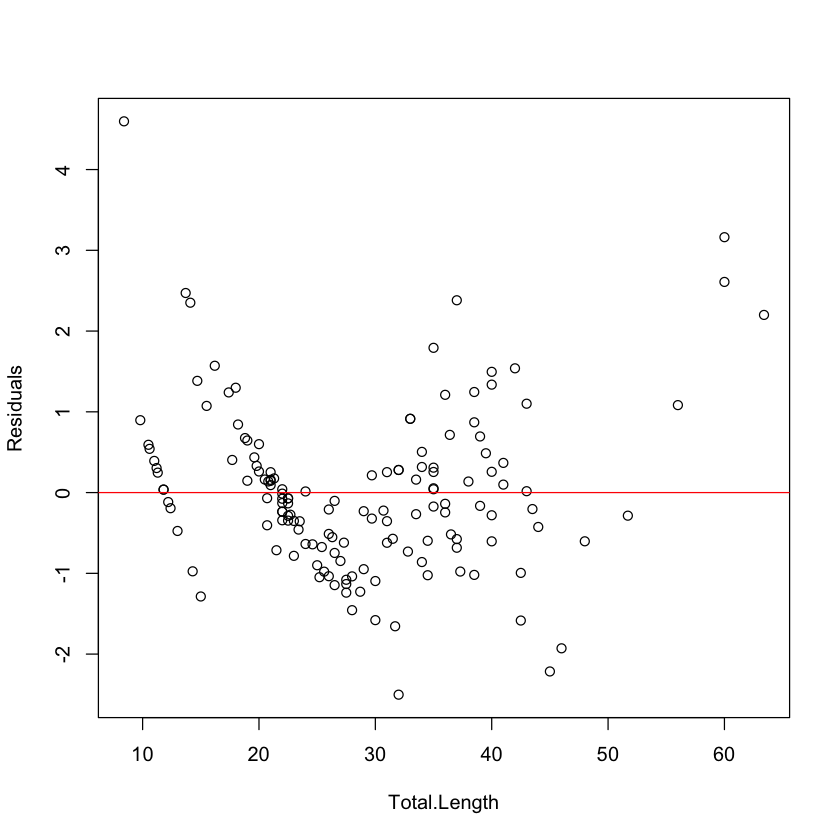

In [16]:
#Linearity
resids3 = stdres(model3)

plot(fish2[,4], resids3, xlab="Total.Length", ylab="Residuals")
abline(0,0,col="red")

There is only one quantitative predictor in the reduced model (Total.Length). There still seems to be some relationship between the residuals and the dependent variable. Therefore the linearity assumption does not hold.

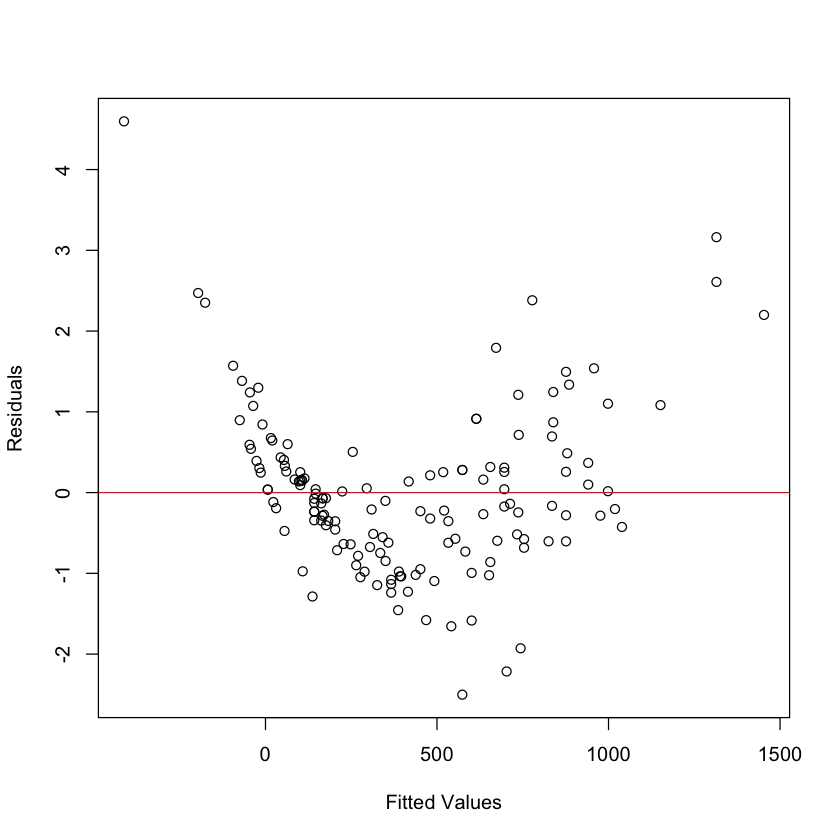

In [17]:
#Constant Variance
fits3 = model3$fitted

plot(fits3, resids3, xlab="Fitted Values", ylab="Residuals")
abline(0,0,col="red")

The residuals are not constant with fitted values. Therefore the constant variance assumption does not hold.

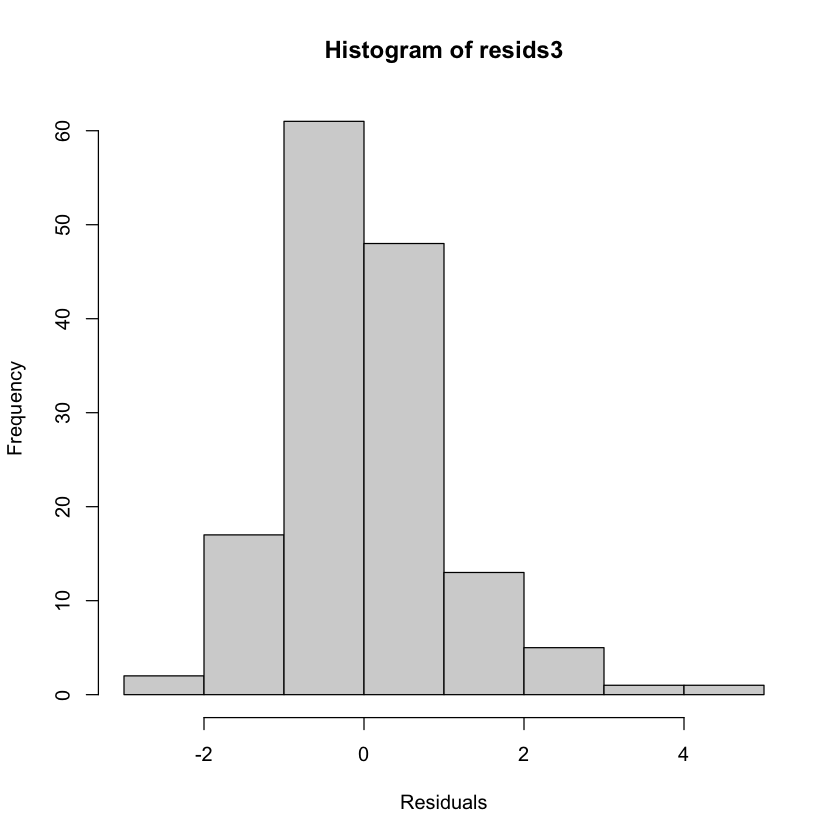

37 124 
 36 123

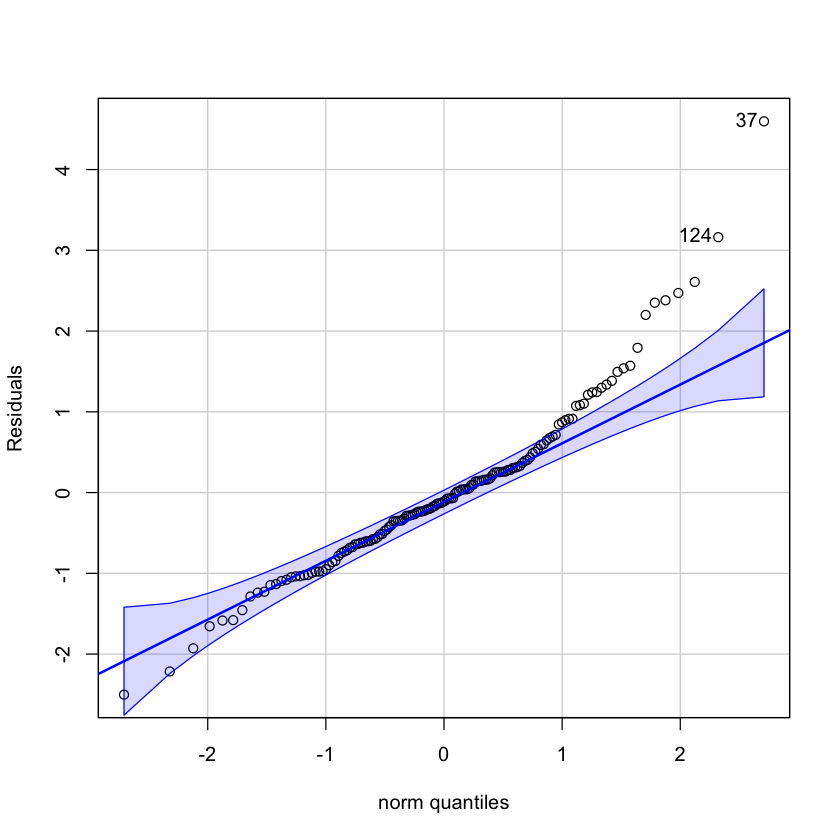

In [20]:
#Normality
hist(resids3, xlab="Residuals", nclass=10)
qqPlot(resids3, ylab="Residuals")

The histogram shwos a slight right skew and there is a tail that deviates from normal in the q-q plot. Therefore the normality assumption does not hold.

# Question 7: Transformation [9 pts]

**(a) Use model3 to find the optimal lambda, rounded to the nearest 0.5, for a Box-Cox transformation on model3.  What transformation, if any, should be applied according to the lambda value?  Please ensure you use model3**

[1] 0.5

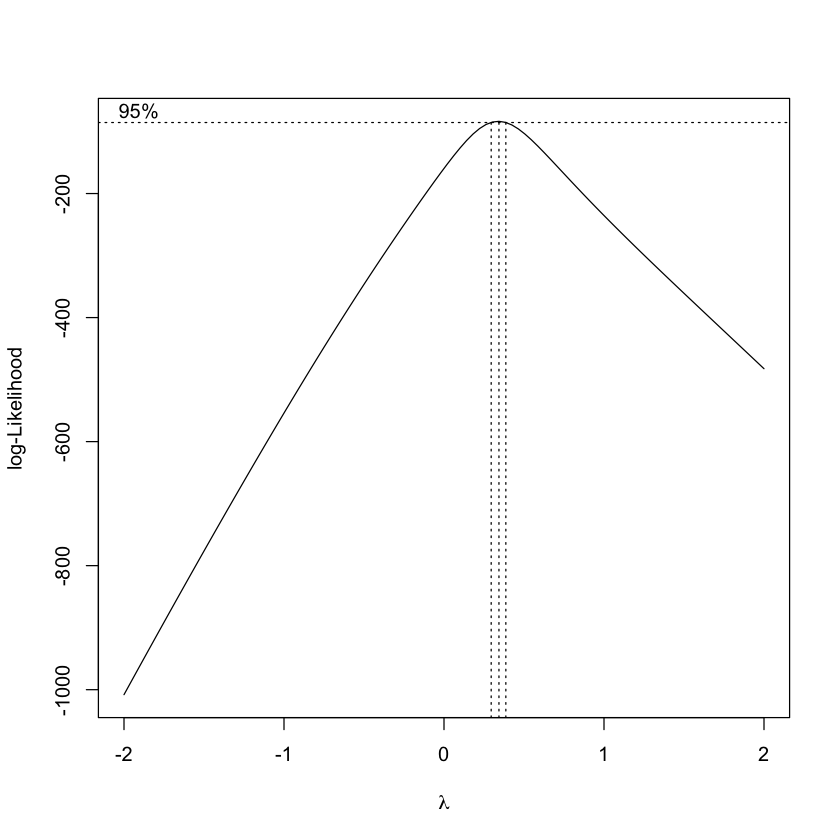

In [24]:
library(plyr)

bc <- boxcox(model3)
lambda <- bc$x[which(bc$y == max(bc$y))]

round_any(lambda,0.5,f = ceiling)

The lambda value is 0.5 which corresponds to the square root transformation.

**(b) Based on the results in (a), create model4 with the appropriate transformation. Display the summary.**

In [25]:
model4 <- lm(sqrt(Weight)~Species + Total.Length, data=fish2)

summary(model4)


Call:
lm(formula = sqrt(Weight) ~ Species + Total.Length, data = fish2)

Residuals:
    Min      1Q  Median      3Q     Max 
-5.0111 -0.7687 -0.0579  0.6797  4.6383 

Coefficients:
                  Estimate Std. Error t value Pr(>|t|)    
(Intercept)       -6.96654    0.57278 -12.163  < 2e-16 ***
SpeciesParkki     -0.36404    0.52476  -0.694   0.4890    
SpeciesPerch      -1.95734    0.29342  -6.671 5.46e-10 ***
SpeciesPike      -10.90490    0.45001 -24.233  < 2e-16 ***
SpeciesRoach      -2.09340    0.40630  -5.152 8.58e-07 ***
SpeciesSmelt      -1.04994    0.53782  -1.952   0.0529 .  
SpeciesWhitefish  -0.55048    0.56758  -0.970   0.3338    
Total.Length       0.95052    0.01594  59.649  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.28 on 140 degrees of freedom
Multiple R-squared:  0.9817,	Adjusted R-squared:  0.9808 
F-statistic:  1074 on 7 and 140 DF,  p-value: < 2.2e-16


**(c) Perform Residual Analysis on model4. Comment on each assumption.  Was the transformation successful/unsuccessful?**

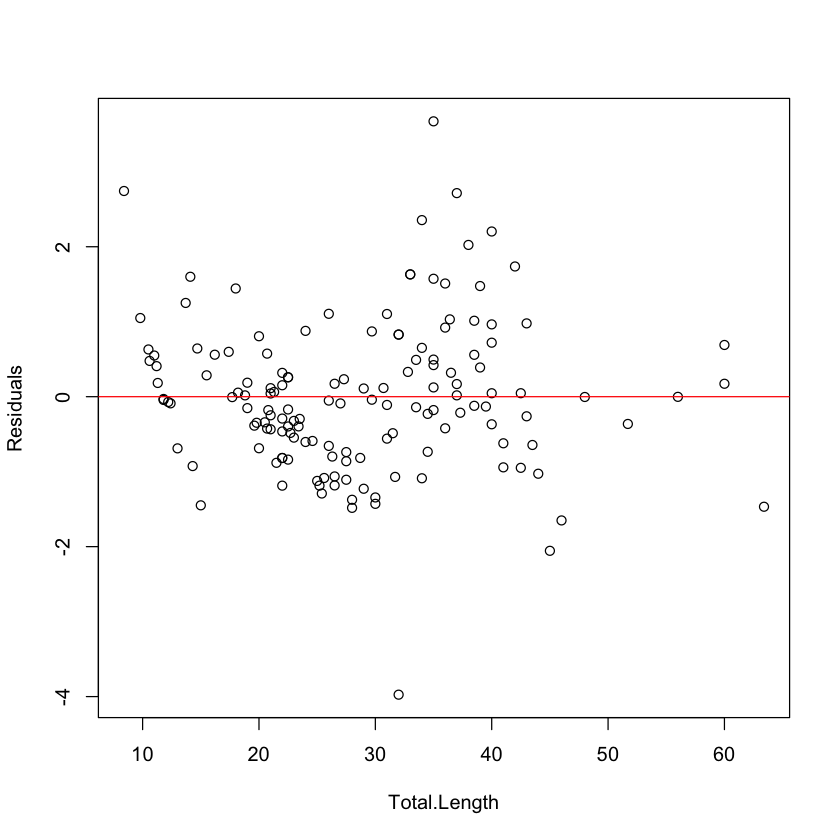

In [27]:
#Linearity
resids4 = stdres(model4)

plot(fish2[,4], resids4, xlab="Total.Length", ylab="Residuals")
abline(0,0,col="red")

The linearity assumption holds as the residuals are independantly scattered around 0 when plotted against the dependent variable, Total.Length

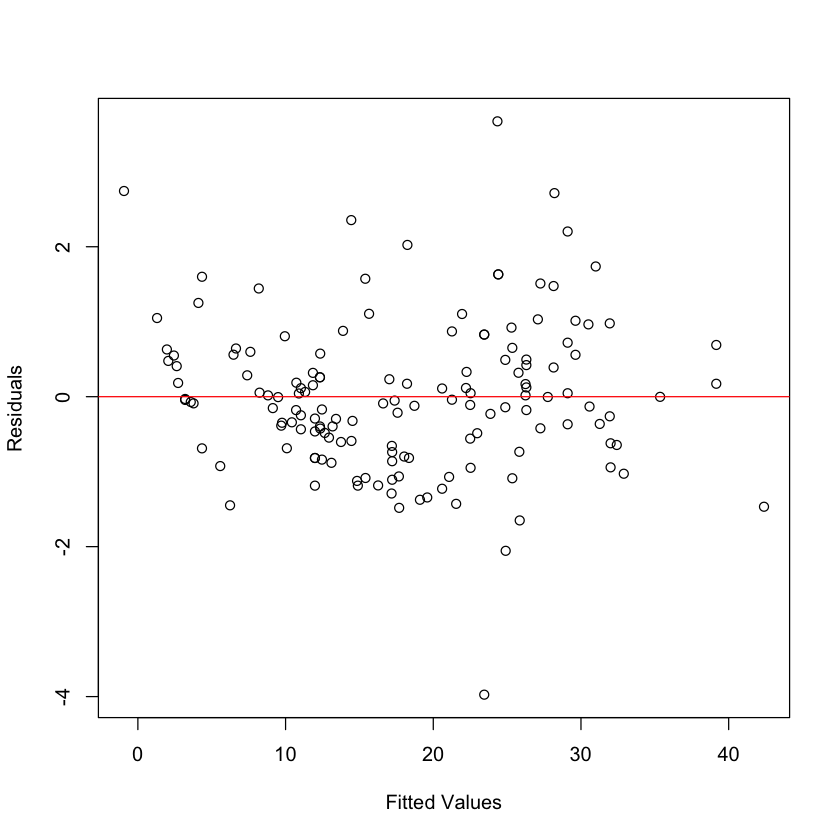

In [28]:
#Constant Variance
fits4 = model4$fitted

plot(fits4, resids4, xlab="Fitted Values", ylab="Residuals")
abline(0,0,col="red")

After transformation, the constant variance assumption holds because the residuals are scattered amongst 0 for all fitted values.

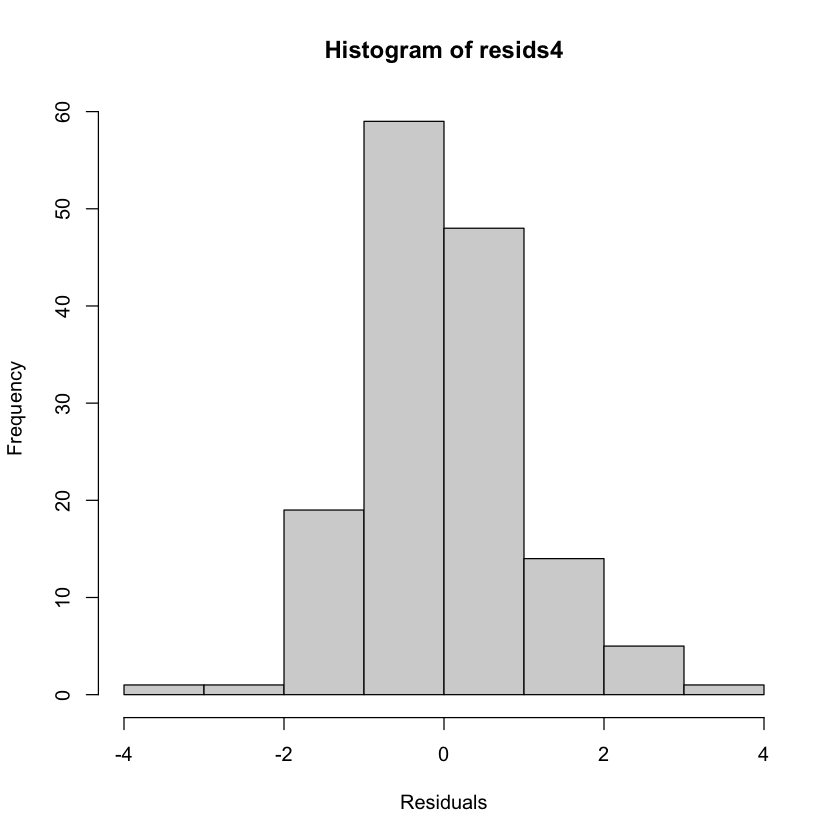

131 141 
130 140

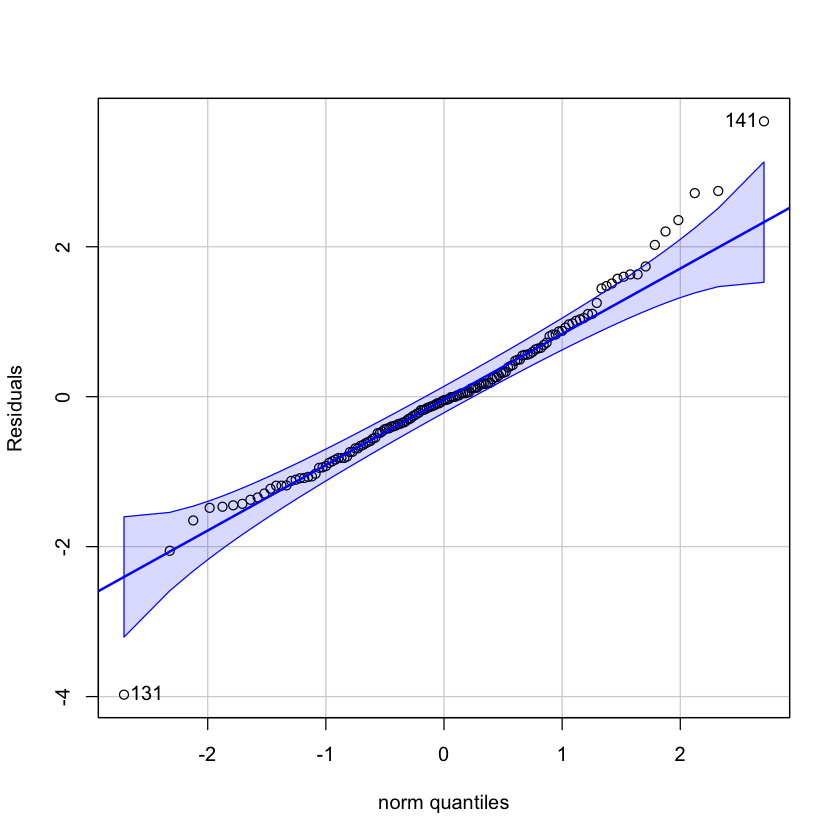

In [29]:
#Normality
hist(resids4, xlab="Residuals", nclass=10)
qqPlot(resids4, ylab="Residuals")

After transformation, the residuals display a normal behavior when viewed in the histogram and q-q plot. The normality assumption holds.

Yes - the transformation was successful.

# Question 8: Model Comparison  [2 pts]

**(a) Using each model summary, compare and discuss the R-squared and Adjusted R-squared of model2, model3, and model4.**


The r-squared of model2, model3, and model4 are 0.8419, 0.9353, and 0.9817, respectively. The adjusted r-squared for model2, model3, and model4 are 0.8292, 0.9321, and 0.9808, respectively.

Because we are comparing models with a different number of predictors we should use the adjusted r-squared values for comparison. This is because increasing the number of predictors will always artificially increase the r-squared. The adjusted r-squared adjusts for the number of predictors.

Using the adjusted r-squared, model4 (0.9808) captures the highest amount of variation.

# Question 9: Prediction [8 points]

**(a) Predict Weights for the last 10 rows of data (fishtest) using both model3 and model4.  Compare and discuss the mean squared prediction error (MSPE) of both models.**

In [35]:
pred3 = predict(model3, fishtest)
MSPE3 = mean((pred3 - fishtest$Weight)^2)

pred4 = predict(model4, fishtest)
MSPE4 = mean((pred4 - fishtest$Weight)^2)

paste("The mean squared prediction error for model3 is", round(MSPE3, 2))
paste("The mean squared prediction error for model4 is", round(MSPE4, 2))

[1] "The mean squared prediction error for model3 is 9392.25"

[1] "The mean squared prediction error for model4 is 98076.62"

The MSPE for model4 is significanlty higher than that of model3. This indicate that the predictions for model3 were closer to the expected repsonse as compared to model4. It is important to indicate the model3 violated the assumptions of multiple linear regression so while the MSPE was smaller it is not a valid model to use because the assumptions were violated.

**(b) Suppose you have found a Perch fish with a Body.Height of 28 cm, and a Total.Length of 32 cm. Using model4, predict the weight on this fish with a 90% prediction interval.  Provide an interpretation of the prediction interval.**

In [41]:
newtest = fishtest[1,]

newtest$Species = "Perch"
newtest$Body.Height = 28
newtest$Total.Length = 32

predict(model4, newtest, interval='prediction')

,fit,lwr,upr
150,21.49286,18.93522,24.05049


The predicted value is 21.5. The lower bound of the prediction using a 90% confidence interval is 18.9 while the upper bound is 24.1.